In [1]:
# ANN - Hyper Parameter Tuning

In [2]:
import pandas as pd # data manipulation and data handling
import numpy as np # linear algebra
import matplotlib as plt # data vizualization
import seaborn as sns # data visualization
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_style("dark")

In [3]:
# train data
train=pd.read_csv("/train.csv") # read the file
train.head() # display the dataset with top 5 records

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# test data
test=pd.read_csv("/test.csv") # read test data
test.head() # display top 5 records

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train.info() # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
print()
print("Shape of the train dataset----",train.shape)
print()


Shape of the train dataset---- (8693, 14)



In [7]:
train.nunique() # unique values in each columns

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [8]:
train.Transported.unique() # unique values in transported

array([False,  True])

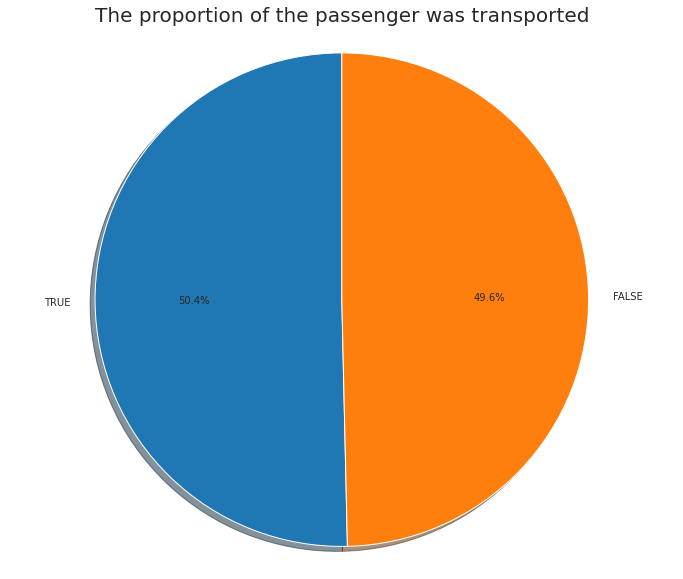

In [9]:
# vizualize target variable
labels = 'TRUE', 'FALSE' # labels
sizes = [train.Transported[train["Transported"]==True].count(), train.Transported[train["Transported"]==False].count()]

fig1, ax1 = plt.subplots(figsize=(12, 10)) # figzize
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)# percentage and angle 
ax1.axis('equal')
plt.title("The proportion of the passenger was transported", size = 20)# plot title
plt.show()

In [10]:
categorical_col = ["HomePlanet","CryoSleep","Destination","VIP"] # assign categorical variable
numeric_col = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"] # assign numeric variable

In [11]:
def labels ():  ### here i creat the function for applying labels in each graphs
    x_axis=plt.gca()
    for px in x_axis.patches:
        x_axis.text(px.get_x() + px.get_width()/2, px.get_height(), '%d' % int(px.get_height()),fontsize=13,color='black',rotation = 45,ha='center',va='bottom')
# this can plot with values 

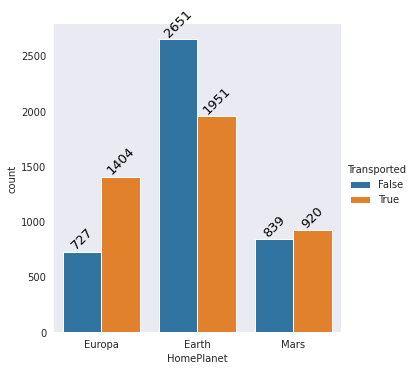

In [12]:
# HomePlanet vs transprted
# homeplanet is The planet the passenger departed from, typically their planet of permanent residence.
sns.catplot(x="HomePlanet",kind='count',hue = 'Transported',data=train)
sns.set_style("dark")
sns.set(rc={"figure.figsize":(4, 3)})
labels()

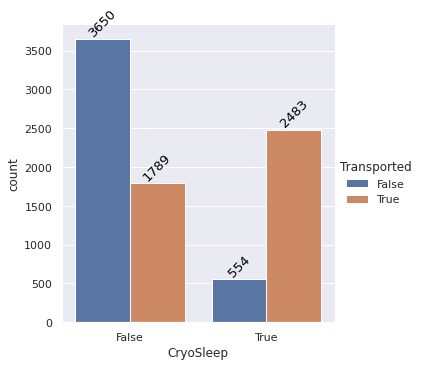

In [13]:
# CryoSleep vs Transported
# CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.
#Passengers in cryosleep are confined to their cabins.
sns.catplot(x="CryoSleep",kind='count',hue = 'Transported',data=train)
sns.set_style("dark")
sns.set(rc={"figure.figsize":(4, 3)})
labels()

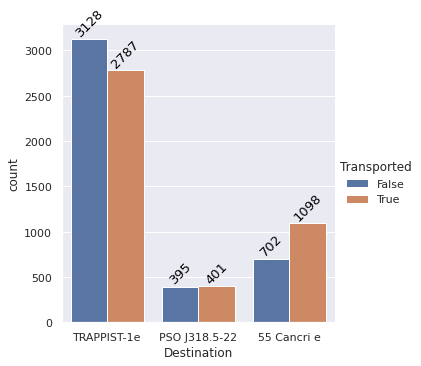

In [14]:
# Destination vs transported
# Destination - The planet the passenger will be debarking to.

sns.catplot(x="Destination",kind='count',hue = 'Transported',data=train)
sns.set_style("dark")
sns.set(rc={"figure.figsize":(4, 3)})
labels()

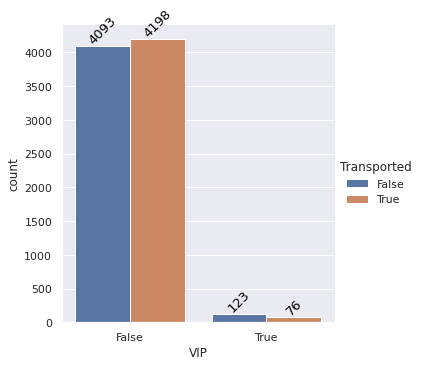

In [15]:
# VIP vs Transported
# Whether the passenger has paid for special VIP service during the voyage.
sns.catplot(x="VIP",kind='count',hue = 'Transported',data=train)
sns.set_style("dark")
sns.set(rc={"figure.figsize":(4, 3)})
labels()


In [16]:
### BIVARIATE ANALYSIS for numeric value


In [17]:

train.describe() 

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


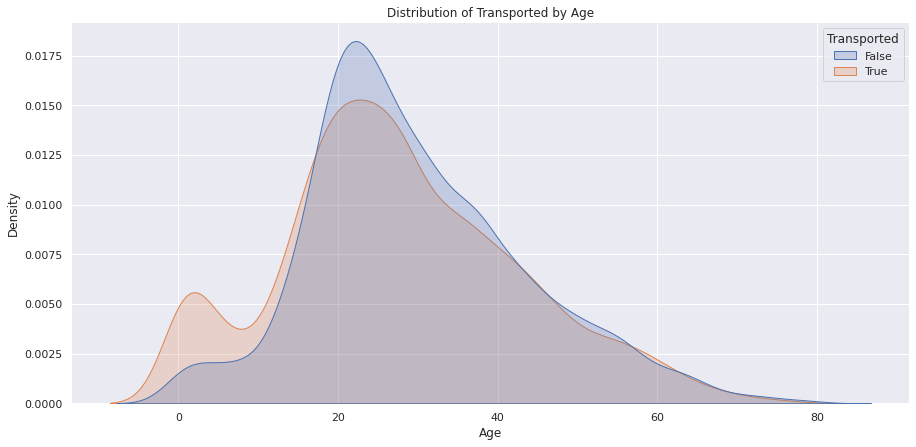

In [18]:
# age vs transported
plt.figure(figsize=(15,7))
sns.kdeplot(train['Age'], hue=train['Transported'], fill=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('Age')
plt.title('Distribution of Transported by Age');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


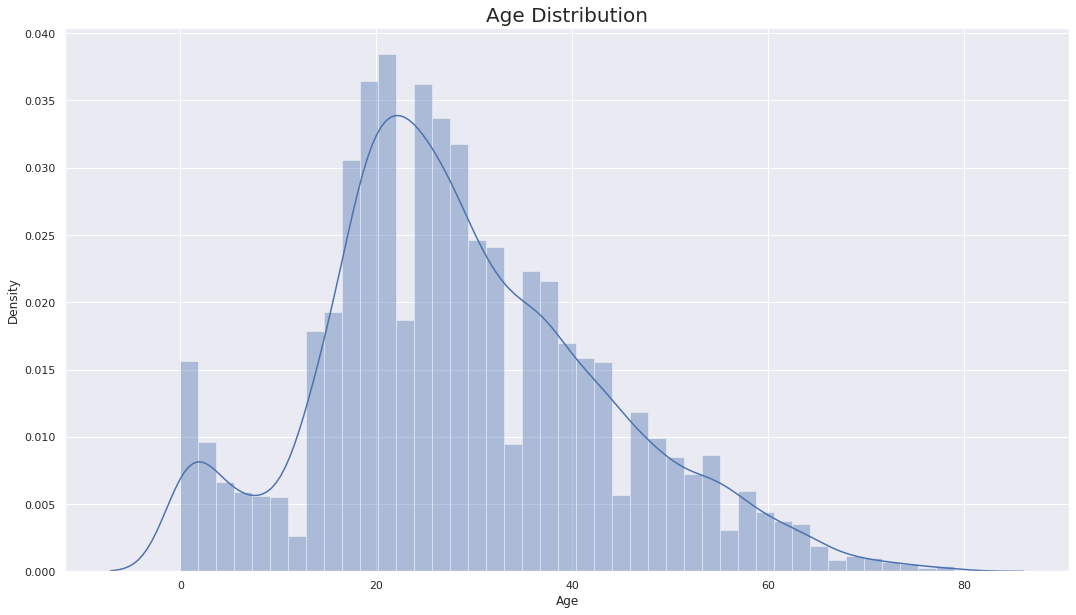

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


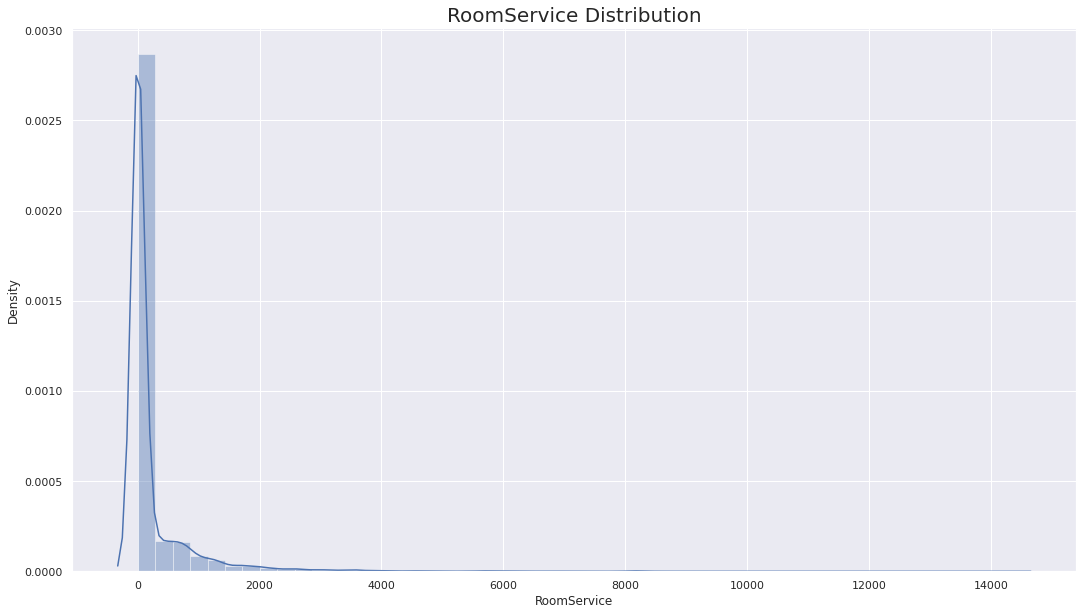

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


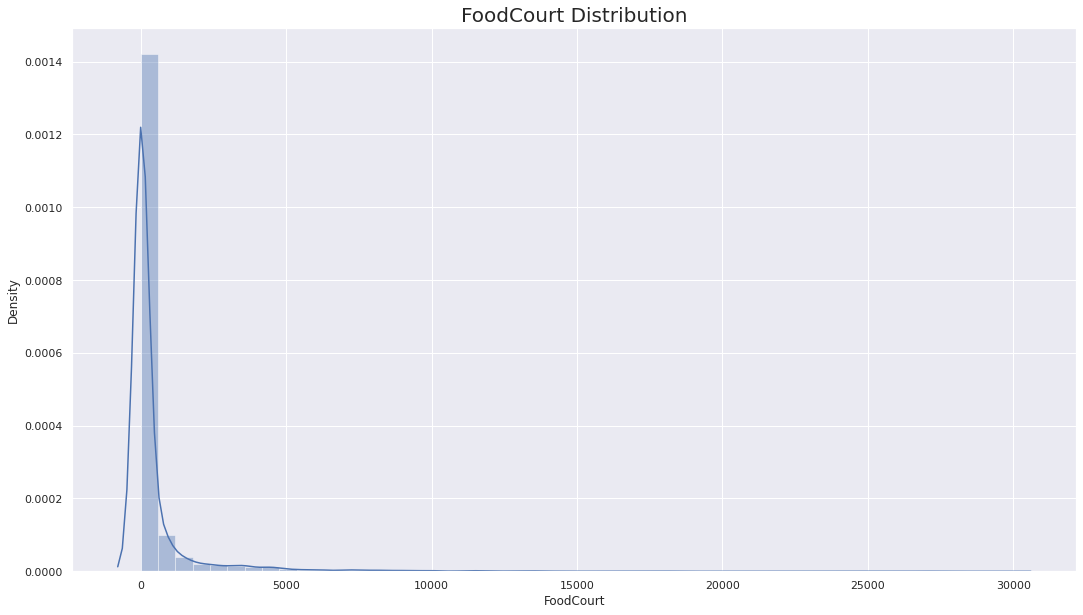

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


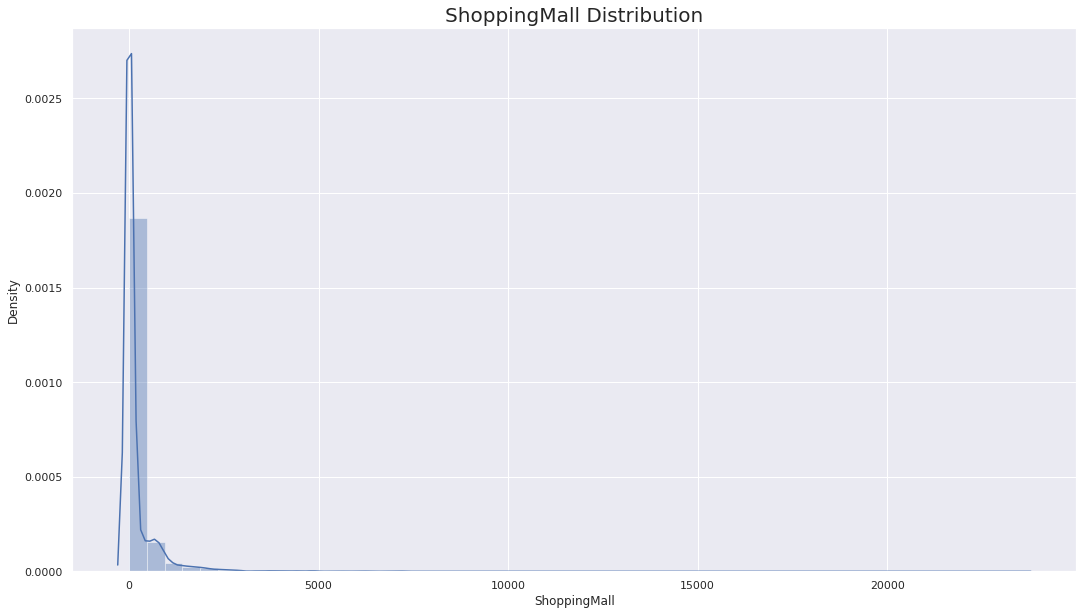

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


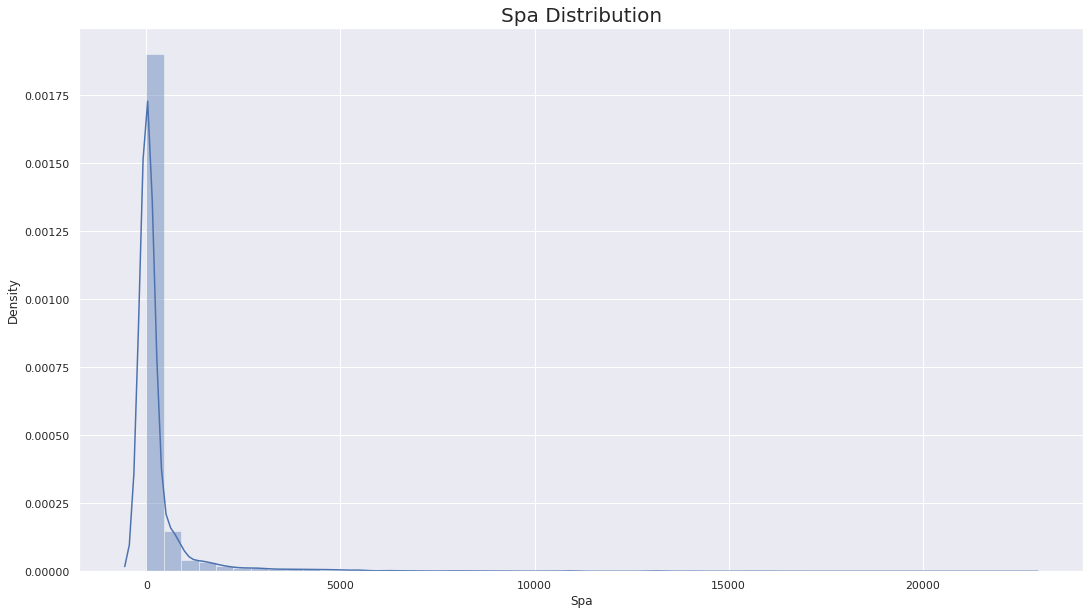

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


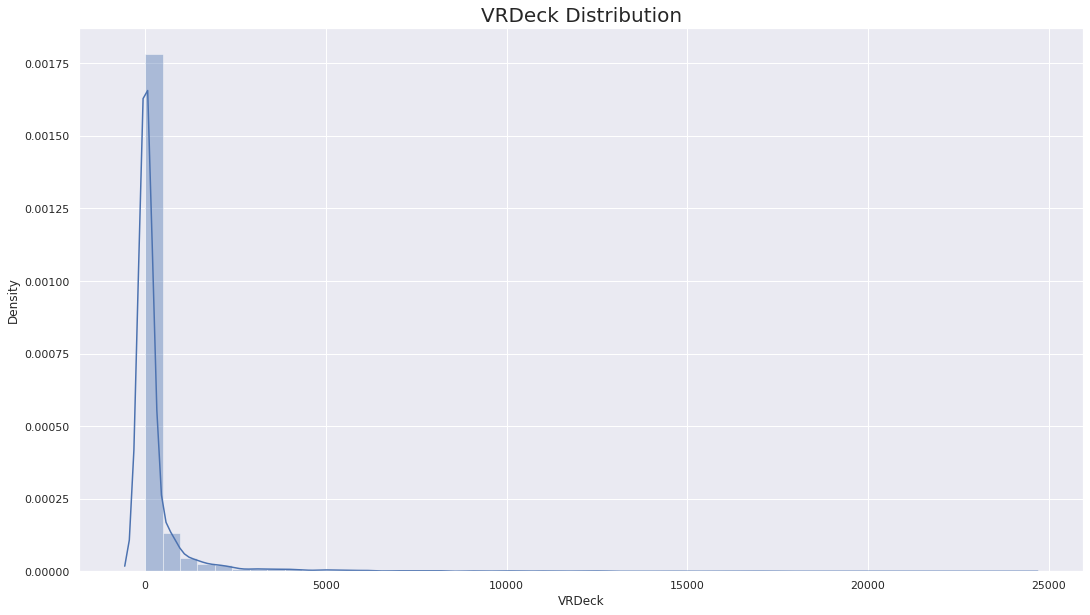

In [19]:
for feature in numeric_col:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(train[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

DATA PRE-PROCESSING

In [20]:
print("number of missing value in each features for train Data:")
print()
print(train.isnull().sum())

number of missing value in each features for train Data:

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [21]:
train = train.drop(['PassengerId','Cabin','Name'],axis=1) # drop unwanted column
print("number of missing value in each features for test Data:")
print()
print(test.isnull().sum())

number of missing value in each features for test Data:

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [22]:
test = test.drop(['Cabin','Name'],axis=1) # drop unwanded column

In [23]:
missing_columns = ["HomePlanet", "CryoSleep","Age","Destination","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]# all missing features
for i in missing_columns:
    print("Column :", i) # print features
    print("Unique :",train[i].nunique())# printing n unique
    print("Dtypes :",train[i].dtypes)  
    print("--------------------------------------------")

Column : HomePlanet
Unique : 3
Dtypes : object
--------------------------------------------
Column : CryoSleep
Unique : 2
Dtypes : object
--------------------------------------------
Column : Age
Unique : 80
Dtypes : float64
--------------------------------------------
Column : Destination
Unique : 3
Dtypes : object
--------------------------------------------
Column : VIP
Unique : 2
Dtypes : object
--------------------------------------------
Column : RoomService
Unique : 1273
Dtypes : float64
--------------------------------------------
Column : FoodCourt
Unique : 1507
Dtypes : float64
--------------------------------------------
Column : ShoppingMall
Unique : 1115
Dtypes : float64
--------------------------------------------
Column : Spa
Unique : 1327
Dtypes : float64
--------------------------------------------
Column : VRDeck
Unique : 1306
Dtypes : float64
--------------------------------------------


HANDLING MISSING VALUE

In [24]:
# filling null values for categorical values
train["HomePlanet"].fillna(train["HomePlanet"].mode()[0],inplace=True)
test["HomePlanet"].fillna(test["HomePlanet"].mode()[0],inplace=True)
# Filling CryoSleep features
train["CryoSleep"].fillna(train["CryoSleep"].mode()[0],inplace=True)
test["CryoSleep"].fillna(test["CryoSleep"].mode()[0],inplace=True)
train["Destination"].fillna(train["Destination"].mode()[0],inplace=True)
test["Destination"].fillna(test["Destination"].mode()[0],inplace=True)
train["VIP"].fillna(train["VIP"].mode()[0],inplace=True)
test["VIP"].fillna(test["VIP"].mode()[0],inplace=True)
# FILLING NULL VALUES FOR NUMERIC
train["Age"].fillna(train["Age"].mean(),inplace =True)
test["Age"].fillna(train["Age"].mean(),inplace =True)
train["RoomService"].fillna(train["RoomService"].mean(),inplace =True)
test["RoomService"].fillna(train["RoomService"].mean(),inplace =True)
train["FoodCourt"].fillna(train["FoodCourt"].mean(),inplace =True)
test["FoodCourt"].fillna(train["FoodCourt"].mean(),inplace =True)
train["ShoppingMall"].fillna(train["ShoppingMall"].mean(),inplace =True)
test["ShoppingMall"].fillna(train["ShoppingMall"].mean(),inplace =True)
train["VRDeck"].fillna(train["VRDeck"].mean(),inplace =True)
test["VRDeck"].fillna(train["VRDeck"].mean(),inplace =True)
train["Spa"].fillna(train["Spa"].mean(),inplace =True)
test["Spa"].fillna(train["Spa"].mean(),inplace =True)

In [25]:
# re checking the null values 
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [26]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [27]:
# grouping the age 
train.loc[train['Age'] <= 14, 'Age'] = 0
train.loc[(train['Age'] > 14) & (train['Age'] <= 24), 'Age'] = 1
train.loc[(train['Age'] > 24) & (train['Age'] <= 39), 'Age'] = 2
train.loc[(train['Age'] > 39) & (train['Age'] <= 59), 'Age'] = 3
train.loc[train['Age'] > 59, 'Age'] = 4
    
test.loc[test['Age'] <= 14, 'Age'] = 0
test.loc[(test['Age'] > 14) & (test['Age'] <= 24), 'Age'] = 1
test.loc[(test['Age'] > 24) & (test['Age'] <= 39), 'Age'] = 2
test.loc[(test['Age'] > 39) & (test['Age'] <= 59), 'Age'] = 3
test.loc[test['Age'] > 59, 'Age'] = 4

LABEL ENCODING

In [28]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ["HomePlanet","CryoSleep","Destination","VIP"]
labling = pd.DataFrame()

for column in categorical_col:
    labelencoder = LabelEncoder()
    train[column] = labelencoder.fit_transform(train[column])
    labling[column] = train[column]
    labling['_'+column] =  labelencoder.inverse_transform(train[column])
categorical_col = ["HomePlanet","CryoSleep","Destination","VIP"]
labling = pd.DataFrame()

for column in categorical_col:
    labelencoder = LabelEncoder()
    test[column] = labelencoder.fit_transform(test[column])
    labling[column] = test[column]
    labling['_'+column] =  labelencoder.inverse_transform(test[column])

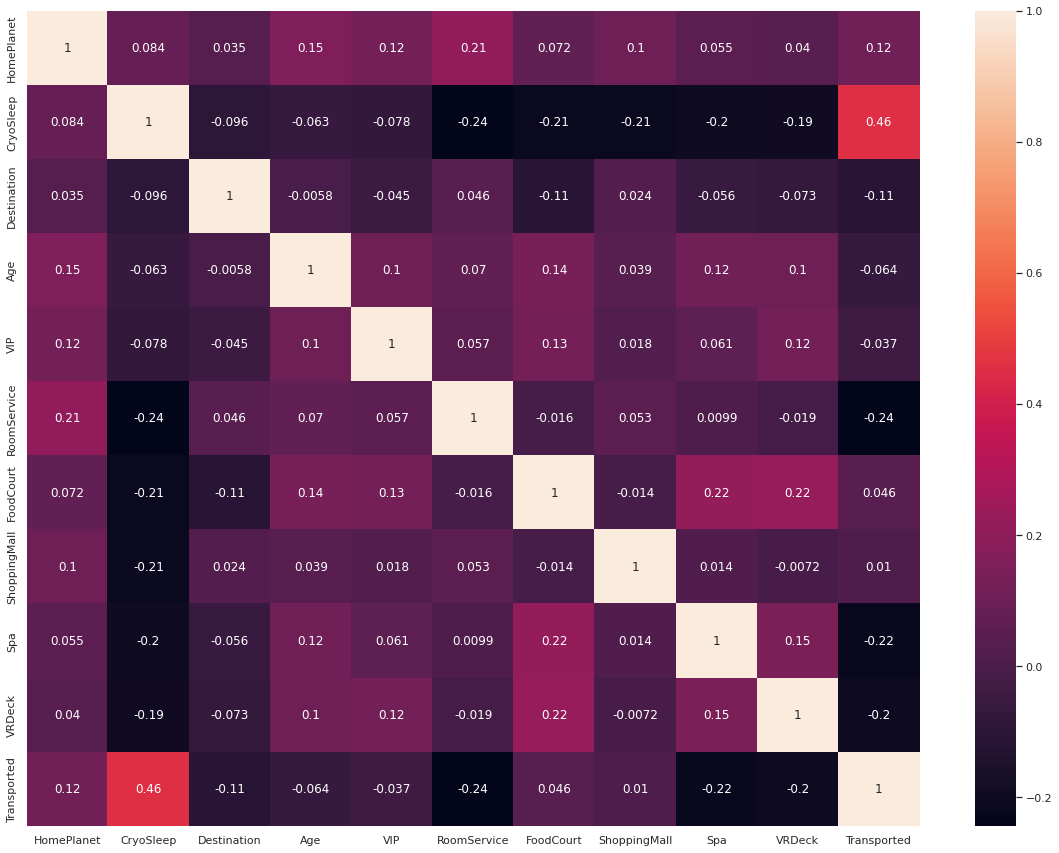

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(), annot=True);

TRAIN TEST SPLIT

In [29]:
features = [col for col in train.columns if col not in ['Transported']]

X = train[features]
y = train['Transported']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

FEATURE SCALING

In [31]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
# Scaled feature
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

ANN - HYPER PARAMETER TUNING

In [86]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


In [98]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1])) # input dimension is size of the x train
            model.add(Activation(activation))
            
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) 
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=1)
model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app


In [102]:
layers = [[20], [40, 20], [45, 30, 15], [20, 30, 45,15],[10, 20,30, 45,15]]
activations = ['relu']
kernel_initializer = [""]
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [103]:
grid_result = grid.fit(x_train, y_train)

Epoch 1/30
44/44 [==============================] - 1s 2ms/step - loss: 1.1070 - accuracy: 0.5661
Epoch 2/30
44/44 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6099
Epoch 3/30
44/44 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.6470
Epoch 4/30
44/44 [==============================] - 0s 2ms/step - loss: 0.5890 - accuracy: 0.6969
Epoch 5/30
44/44 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7154
Epoch 6/30
44/44 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.7277
Epoch 7/30
44/44 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7142
Epoch 8/30
44/44 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.7365
Epoch 9/30
44/44 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7402
Epoch 10/30
44/44 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7426
Epoch 11/30
44/44 [

In [104]:
[grid_result.best_score_,grid_result.best_params_]

[0.789905309677124,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [45, 30, 15]}]